## Writing Assignment 
### CS 328: Data Science
Group Members:
1. Juhil Aslaliya
2. Harendra Khatik
3. Samiksha Kamble
4. Vishal Ghoniya

### Introduction
We look to find the trends in prices of commodity in major agricultural markets of Gujarat over a span of 12 years as per the weather activities. <br>
We took into account several major markets of following districts:
1. Ahmedabad
2. Banaskantha
3. Surat
4. Rajkot

The commodities we included are: 
1. Groundnut
2. Lemon
3. Wheat
4. Cotton

Timeline is: 01-Jan-2010 to 31-Dec-2022

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_record = pd.read_excel("Dataset_update.xlsx", sheet_name="Record")
df_record

,Crop,Market,District,Variety
0,Cotton,Dhandhuka,Ahmedabad,Shanker 6 (B) 30mm FIne
1,Lemon,Ahmedabad,Ahmedabad,Other
2,Wheat,Many,Ahmedabad,Many
3,Groundnut (pods),Ahmedabad,Ahmedabad,Other
4,Groundnut (pods),Vyra,Surat,Other
5,Cotton,Many,Surat,Many
6,Wheat,Many,Surat,Many
7,Lemon,Surat,Surat,Other
8,Cotton,Rajkot,Rajkot,Nama BT Cotton and Other
9,Lemon,Gondal (Veg market),Rajkot,Other


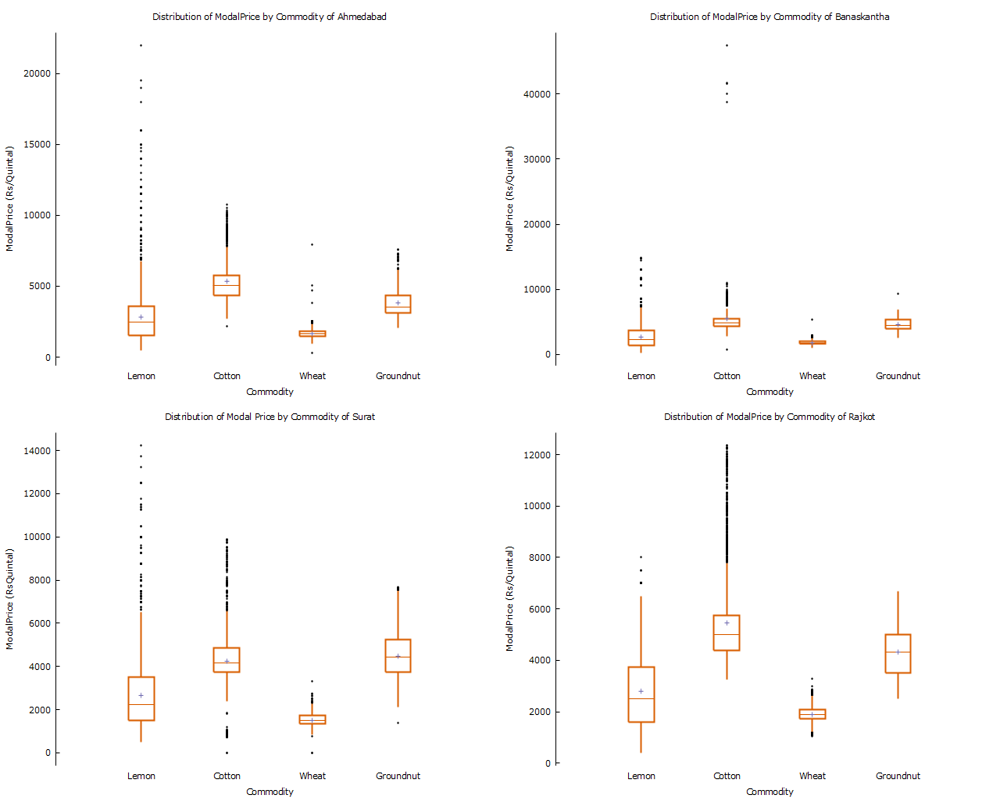

In [3]:
from PIL import Image

# Open the 4 input image files
im1 = Image.open('Boxplot for Commodity by Ahmedabad.png')
im2 = Image.open('Boxplot for Commodity by Banaskantha.png')
im3 = Image.open('Boxplot for Commodity by Surat.png')
im4 = Image.open('Boxplot for Commodity by Rajkot.png')

# Resize the images to have the same size
size = (500, 400)
im1 = im1.resize(size)
im2 = im2.resize(size)
im3 = im3.resize(size)
im4 = im4.resize(size)

combined = Image.new('RGB', (1000, 800))

# Paste the 4 images into the 4 quadrants of the new image
combined.paste(im1, (0, 0))
combined.paste(im2, (500, 0))
combined.paste(im3, (0, 400))
combined.paste(im4, (500, 400))
combined.save('combinedboxplot.png')
from IPython.display import Image
Image(filename='combinedboxplot.png')


In above plots we see that in general wheat price is least spread out as compared to other commodities in their respective markets. Mean of the wheat is also the lowest among all price distribution. Lemon's price distributions' interquartile range is the largest among all. 

In [4]:
df_s = pd.read_excel("Dataset_update.xlsx", sheet_name = "Surat")
df_a = pd.read_excel("Dataset_update.xlsx", sheet_name = "Ahmedabad")
df_r = pd.read_excel("Dataset_update.xlsx", sheet_name = "Rajkot")
df_b = pd.read_excel("Dataset_update.xlsx", sheet_name = "Banaskantha")

df_a['City'] = 'Ahmedabad'
df_b['City'] = 'Banaskantha'
df_r['City'] = 'Rajkot'
df_s['City'] = 'Surat'

df_final = pd.concat([df_a, df_b, df_r, df_s])
df_final = df_final[['Price Date', 'Modal Price (Rs./Quintal)', 'Commodity', 'City']]
df_final['Commodity by City'] = df_final.apply(axis = 1, func = lambda x : x['Commodity'] + ', ' + x['City'])
df_final

,Price Date,Modal Price (Rs./Quintal),Commodity,City,Commodity by City
0,2022-12-31,1950.0,Lemon,Ahmedabad,"Lemon, Ahmedabad"
1,2022-12-30,1850.0,Lemon,Ahmedabad,"Lemon, Ahmedabad"
2,2022-12-29,1850.0,Lemon,Ahmedabad,"Lemon, Ahmedabad"
3,2022-12-28,1700.0,Lemon,Ahmedabad,"Lemon, Ahmedabad"
4,2022-12-26,1900.0,Lemon,Ahmedabad,"Lemon, Ahmedabad"
...,...,...,...,...,...
8393,2010-01-06,2700.0,Groundnut,Surat,"Groundnut, Surat"
8394,2010-01-05,2712.0,Groundnut,Surat,"Groundnut, Surat"
8395,2010-01-04,2700.0,Groundnut,Surat,"Groundnut, Surat"
8396,2010-01-02,2737.0,Groundnut,Surat,"Groundnut, Surat"


The hypotheses we are testing are:
1. H0: There is no difference in daily price of commodity across the markets in the Gujarat state. 
2. H0: The daily price of the commodity aren't affected by seasonal changes.

In [5]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H4('Crop Data for Different cities'),
    dcc.Dropdown(
        id="dropdown1",
        options=[{'label': i, 'value': i} for i in ['Groundnut', 'Cotton', 'Wheat', 'Lemon']],
        value=['Groundnut', 'Cotton', 'Wheat', 'Lemon'],
        multi=True
    ),
    dcc.Dropdown(
        id="dropdown2",
        options=[{'label': i, 'value': i} for i in ['Ahmedabad', 'Banaskantha', 'Rajkot', 'Surat']],
        value=['Ahmedabad', 'Banaskantha', 'Rajkot', 'Surat'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown1", "value"), Input("dropdown2", "value")])
def update_bar_chart(coms, locs):
    df = df_final
    df = df[df['City'].isin(locs)]
    df = df[df['Commodity'].isin(coms)]
    fig = px.line(
        df, x='Price Date', y='Modal Price (Rs./Quintal)', color='Commodity by City')
    return fig

app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



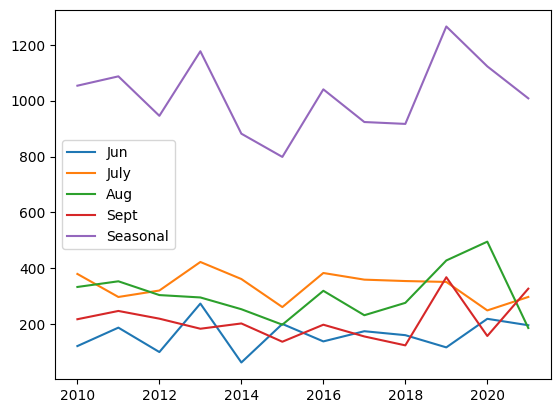

In [6]:
%matplotlib inline
import numpy as np
df_w = pd.read_excel("Dataset_update.xlsx", sheet_name = "Rainfall")
plt.figure()
plt.plot(df_w['Year'], df_w['Jun'], label="Jun")
plt.plot(df_w['Year'], df_w['July'], label="July")
plt.plot(df_w['Year'], df_w['Aug'], label="Aug")
plt.plot(df_w['Year'], df_w['Sept'], label="Sept")
plt.plot(df_w['Year'], df_w['Jn-sept'], label="Seasonal")
plt.legend()
plt.show()

### Rainfall dataset
| Year | Jun | July | Aug | Sept | Jn-sept |
| --- | --- | --- | --- | --- | --- |
| 2010 | 122 | 380 | 333.4 | 218 | 1053.4 |
| 2011 | 187.9 | 297.6 | 353.7 | 247.6 | 1086.8 |
| 2012 | 100.6 | 320.7 | 304.4 | 220 | 945.6 |
| 2013 | 274 | 422.8 | 295.9 | 184 | 1176.6 |
| 2014 | 63.3 | 61.8 | 	253.8 | 202.9 | 881.7 |
| 2015 | 201.1 | 261.5 | 198.5 | 137.5 | 798.6 |
| 2016 | 138.7 | 383.4 | 319.7 | 198.4 | 1040.3 |
| 2017 | 175.1 | 359.6 | 232.3 | 156.4 | 923.4 |
| 2018 | 161 | 354.6 | 276.6 | 124.5 | 916.7 |
| 2019 | 117.3 | 351.4 | 428.2 | 368.2 | 1265.2 |
| 2020 | 219.5 | 249.5 | 495.5 | 158 | 1122.5 |
| 2021 | 196.5 | 297.7 | 186.6 | 327.3 | 1008.1 |



Here we can see some causes of the anomalies seen in the prices.

1. <b>Lemon price hike in summer 2022</b>: Lemons have three major harvesting seasons in India, of which they blossom in one of them depending on the breed of the shrub. The three seasons are: (a) Ambe season: flowering: Jan-Feb, harvest: Apr; (b) Mrig season: flowering: Jun-July, harvest: Oct; (c) Hasta season: flowering: Sept-Oct, harvest: Mar. 
<br>The Major harvest season of Gujarat is Ambe season. Now the September rainfall was higher in Sept 2021 than usual, resulting in falling of the flowers and failure of Hasta season. Jan 22 was colder than usual and lemon shrubs are very sensitive to temperature variation, colder temp resulted in wilting of the leaves and flowers, thus Ambe season failed. Now, with the only new harvest, that too anticipated being not much, being due in Oct, The stockpiling starts in spring of whatever the Hasta season's surviving harvest was, as the demand of lemons is bound to increase duing summer months of Apr-May. <br>Low supply and stockpiling led to shortage, which led to price hike. Prices were high enough to motivate the stockpilers release the stocks, and the Ambe season's surviving harvest coming in the market in April led to a decrease in the price after mid-April. Now, the september hike was similar with previous years' (post 2018) hike, except 2020, because market demand was low due to lockdown. This hike can be explained by, again the stockpiling of Ambe season lemons in anticipation of higher consumption in Sept-Oct, as these months have scattered and less frequent rains followed by sunlight, resulting in a very warm and humid climate throughout the state.
<br> There is also another facet to this situation, as the first ever major cyclone that hit India, and was emerged from the Arabian sea was Ockhi(Nov-Dec 2017) due to warming of the Arabian sea due to global warming. Now at least a cyclone forms in the Arabian sea almost every year, bringing high amounts of unexpected rainfall on undesired time.

2. <b>The Unpredictable price on groundnut</b>: The prices pretty much correlate with the rainfall, however, during the harvest of some early riping varieties and the pod formation of the later harvested varieties, rainfall in Sept induces sprouting of seeds inside the pod and a fungus respectively, both are detrimental to the harvest, resulting in price hikes. Groundnuts do not need much water, but they do need some moisture in the soil after the pods have formed, so that the pods can grow in size and the seeds can form inside, and bigger the seeds, better the price<br>Thus, a moderate to good Aug rain, so that the root-like growths of the pollinated flowers can penetrate in the wet soil, followed by less rain in Sept is the ideal situation for groundnuts, and the harvest in such years would be high, resulting in high supply and thus, low prices in years 2014, 2015, 2018, etc. 
<br>High prices correlate with summer times, when generally houseolds in Gujarat start stocking the grains (mostly wheat) and pulses (mostly Chana and Urad, other pulses are grown in Khareef season, which are harvested before the winter, around Diwali) for the year, along with the oil, thus increasing the demand for groundnut oil, a typical type of oil consumed in households across the state.

3.<b>Harvest season of wheat</b> is around March-April. The wheat crop doesn't need much water, and is not irrigated after it is planted in the wet soil after monsoon. The climate of March-April  has been consistent throughout the decade, thus we don't see much price fluctuations. Also, as told in the groundnut paragraph, May is the month when the demand hikes, and after that it drops. In several cases we haven't even found data for the months of Sept-Nov.

4. <b>Cotton</b>: sawing season in June-July, usually when 2-3 consecutive days of moderate rain have been observed. The first harvest is ready after around 4 months, and then the harvest continues as the pods open over the span of 1-1.5 months(typically ends around Diwali if sawing was timely). Thus the supply hike can be seen in October, and the quality of the harvest in the middle of the season is considered the best, so prices may increase in that timeframe. And also the government sets a minimum price for cotton to avoid middleman taking all the profits. However, only one moderate to heavy rainfall during harvest season is enough to spoil the current batch, this may increase the prices, this we see variance around October.

Although we haven't statistically shown the effect of wheather on the daily price of the commodity. We are well acknowledge by the relation of the effects of the weather on the production of the crop and at last on the daily price in the Agromarkets.<br>
Also, when carefully observed in lower prices case then we noticed that price doesn't crosses the minimum bar over the time span which means that there is some rule of minimum price limit for a commodity in the market. <br>
This is what we have learnt in school called governmets' <b>minimum support price</b>.

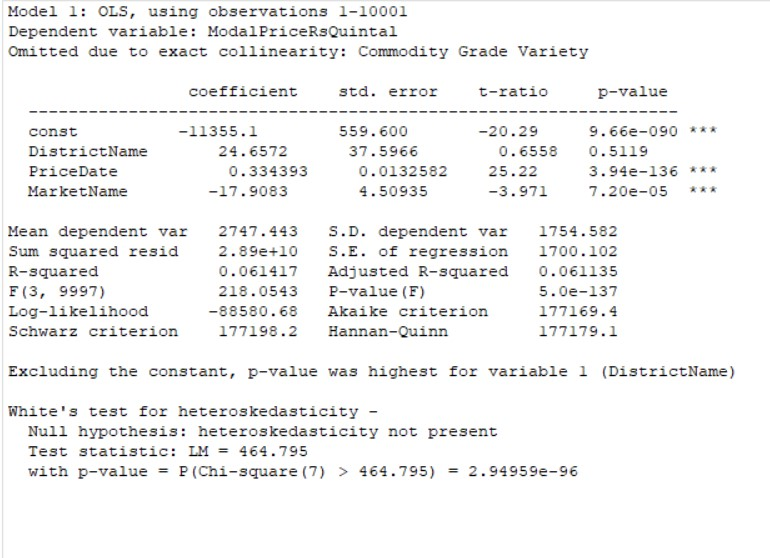

In [7]:
Image(filename="OLS model.jpg")

We used gretl to get the above details.<br><br>
We ran an OLS (Ordinary Least Squares) model on Lemon dataset to look using various regressors and modal price as dependent variable. <br>
Here, we see that DistrictName vairable has p-value 1 which means that it is not statistically insignificant to the modal price of the lemon. <br>
Although MarketName is statiscally significant and has significant effect on the Lemon's price. This means that our null hypothesis of There is no difference in daily price of commodity across the markets in the Gujarat state gets rejected. <br><br>
The sign of the coefficient tells us about the correlation of the dependent variable on the given regressor. We see here MarketName also has some coefficient it is because the string variables are encoded when imported into Gretl software.<br>
<br>
The test for heteroskedasticity is performed to find whether the given regressor and dependent variable have same variability i.e, has similar spread out. 
Our null hypothesis that Heteroskedasticity is not present gets rejected because the p-value for White's test is less than 0.05.<br>

### References

1. For data: https://agmarknet.gov.in/PriceTrends/
2. https://www.srcc.edu/system/files/Article-No8-Efficient-Market-Hypothesis-and-Calendar-Effects-Updates.pdf
 